In [1]:
#Libraries
# This code uses RandomForestRegressor

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#Importing data
data = pd.read_excel("C:/Users/orkun/OneDrive/Masaüstü/Ens 492/Code/Last versions/Simdatawithoutspindlevar.xlsx")
data = data.sample(n=35000, random_state=42)# Sampling random 35000 simulations for increasing the speed of ML training process 

data.head()

,Spindle_Speed,Feed_Rate,Axial_Depth,Radial_Depth,Fx_Max,Fx_Avg,Fy_Max,Fy_Avg,Fz_Max,Fz_Avg
20917,6000,0.02,6.2,4.0,433.815491,229.505084,221.660558,69.372813,80.306306,41.751909
18857,6000,0.21,5.7,2.4,1438.553906,520.110694,258.731918,7.857160,393.031778,138.975724
27507,6000,0.19,7.8,7.6,2187.730041,1608.105426,2232.365811,906.923914,820.961197,543.134115
35527,6000,0.17,9.9,0.8,683.602554,297.031614,236.167651,103.531228,170.085026,73.792460
29950,6000,0.05,8.5,1.2,457.259638,181.536516,253.900156,98.360450,95.488533,37.919533


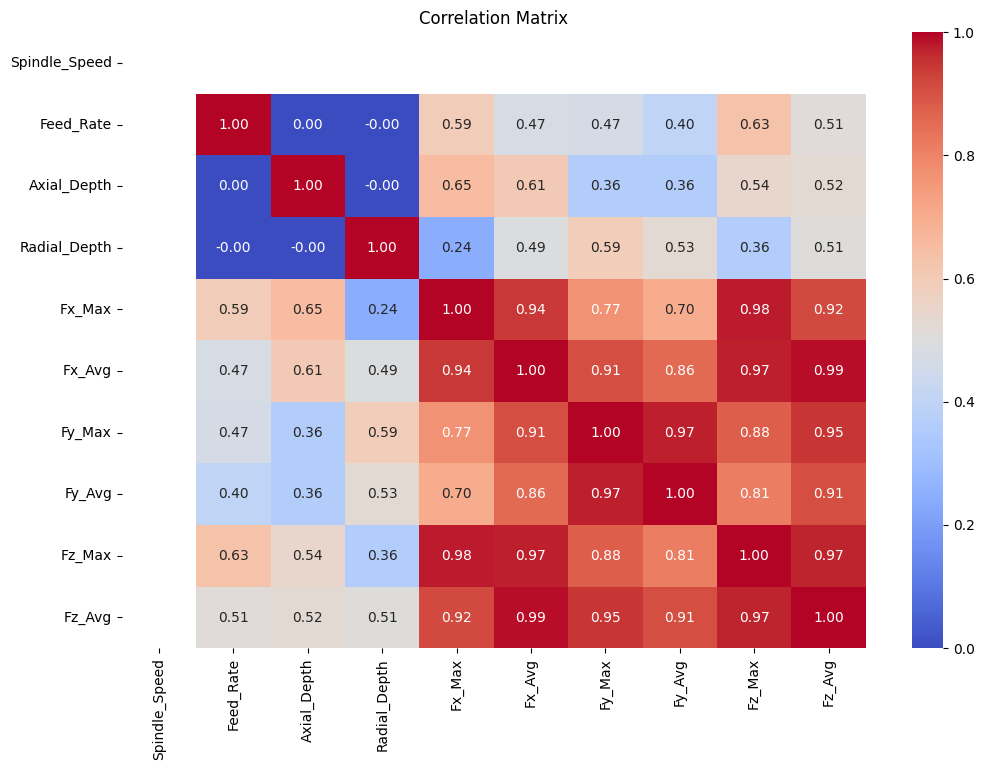

In [3]:
#Creating a correlation matrix

df = data

# Creating correlation matrix
corr_matrix = df.corr()

# Showing correllation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

In [4]:
#splitting features and targets (ignore spindle speed due to it is same for all the simulations)
features = df[['Fx_Max', 'Fx_Avg', 'Fy_Max', 'Fy_Avg', 'Fz_Max', 'Fz_Avg']]
targets = df[['Feed_Rate', 'Axial_Depth', 'Radial_Depth']]
print("Features(inputs):\n")
features.head()


Features(inputs):



,Fx_Max,Fx_Avg,Fy_Max,Fy_Avg,Fz_Max,Fz_Avg
20917,433.815491,229.505084,221.660558,69.372813,80.306306,41.751909
18857,1438.553906,520.110694,258.731918,7.857160,393.031778,138.975724
27507,2187.730041,1608.105426,2232.365811,906.923914,820.961197,543.134115
35527,683.602554,297.031614,236.167651,103.531228,170.085026,73.792460
29950,457.259638,181.536516,253.900156,98.360450,95.488533,37.919533


In [5]:
print("Targets(outputs):\n")
targets.head()

Targets(outputs):



,Feed_Rate,Axial_Depth,Radial_Depth
20917,0.02,6.2,4.0
18857,0.21,5.7,2.4
27507,0.19,7.8,7.6
35527,0.17,9.9,0.8
29950,0.05,8.5,1.2


In [6]:
# Splitting train and test 
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Scaling (we do not use scaled datas due to model performs good with normal ones)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting to DataFrame for better readability
X_train_df = pd.DataFrame(X_train, columns=features.columns)
X_test_df = pd.DataFrame(X_test, columns=features.columns)

# Converting to DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features.columns)

# Showing scaled values
print("Scaled X_train:\n", X_train_scaled_df.head())
print("\n--------------------------------------\n")
# Showing scaled values
print("UnScaled X_train:\n", X_train_df.head())

Scaled X_train:
      Fx_Max    Fx_Avg    Fy_Max    Fy_Avg    Fz_Max    Fz_Avg
0  0.084766  0.096795  0.047831  0.002556  0.050847  0.055612
1  0.408247  0.293485  0.264672  0.126388  0.356658  0.246023
2  0.228638  0.104926  0.065256  0.047901  0.147789  0.073015
3  0.276316  0.120871  0.066139  0.002577  0.209733  0.094961
4  0.344370  0.149422  0.067187  0.048833  0.239331  0.112757

--------------------------------------

UnScaled X_train:
             Fx_Max      Fx_Avg      Fy_Max      Fy_Avg      Fz_Max      Fz_Avg
13105   296.891209  227.150574  181.208869    3.503934   63.949179   44.673831
15787  1250.951285  667.784756  811.658769  173.053081  404.908091  191.677936
21597   721.219050  245.365789  231.868996   65.589589  172.032680   58.109898
8084    861.840244  281.087031  234.437761    3.533541  241.096438   75.052503
23183  1062.554706  345.048860  237.483473   66.866029  274.096483   88.791731


**Random Forest Model**

In [7]:

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200,300],
    'max_features': [0.5, 1.0],
    'max_depth': [20, 50, 100],

}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=2,cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Training model
grid_search.fit(X_train, y_train)

#Pick best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)



Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [8]:

# RMSE Calculation
rmse_feed_rate = np.sqrt(mean_squared_error(y_test['Feed_Rate'], y_pred[:, 0]))
rmse_axial_depth = np.sqrt(mean_squared_error(y_test['Axial_Depth'], y_pred[:, 1]))
rmse_radial_depth = np.sqrt(mean_squared_error(y_test['Radial_Depth'], y_pred[:, 2]))

print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE for Feed Rate: {rmse_feed_rate}")
print(f"RMSE for Axial Depth: {rmse_axial_depth}")
print(f"RMSE for Radial Depth: {rmse_radial_depth}")


Best Parameters: {'max_depth': 50, 'max_features': 0.5, 'n_estimators': 300}
RMSE for Feed Rate: 0.0037555701065745428
RMSE for Axial Depth: 0.12288993539868306
RMSE for Radial Depth: 0.05056006580265095


In [9]:

# Results of all models
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_feed_rate = np.sqrt(mean_squared_error(y_test['Feed_Rate'], y_pred[:, 0]))
    rmse_axial_depth = np.sqrt(mean_squared_error(y_test['Axial_Depth'], y_pred[:, 1]))
    rmse_radial_depth = np.sqrt(mean_squared_error(y_test['Radial_Depth'], y_pred[:, 2]))
    print(f"Parameters: {params}")
    print(f"RMSE for Feed Rate: {rmse_feed_rate}")
    print(f"RMSE for Axial Depth: {rmse_axial_depth}")
    print(f"RMSE for Radial Depth: {rmse_radial_depth}")
    print("-" * 50)

Parameters: {'max_depth': 20, 'max_features': 0.5, 'n_estimators': 100}
RMSE for Feed Rate: 0.003917293618313177
RMSE for Axial Depth: 0.12407844982156756
RMSE for Radial Depth: 0.05304996290955821
--------------------------------------------------
Parameters: {'max_depth': 20, 'max_features': 0.5, 'n_estimators': 200}
RMSE for Feed Rate: 0.0038279640769132103
RMSE for Axial Depth: 0.12253307474517197
RMSE for Radial Depth: 0.05090183417891287
--------------------------------------------------
Parameters: {'max_depth': 20, 'max_features': 0.5, 'n_estimators': 300}
RMSE for Feed Rate: 0.003783936184239776
RMSE for Axial Depth: 0.12226765016348293
RMSE for Radial Depth: 0.050266161139037466
--------------------------------------------------
Parameters: {'max_depth': 20, 'max_features': 1.0, 'n_estimators': 100}
RMSE for Feed Rate: 0.003967815761526528
RMSE for Axial Depth: 0.1256375057307288
RMSE for Radial Depth: 0.05966085175476586
--------------------------------------------------
Par

In [10]:
# Prediction of first 10 indexes
for i in range(10):
    print(f"Index {i}:")
    print(f"Predicted Feed Rate: {y_pred[i, 0]}, Actual Feed Rate: {y_test['Feed_Rate'].values[i]}")
    print(f"Predicted Axial Depth: {y_pred[i, 1]}, Actual Axial Depth: {y_test['Axial_Depth'].values[i]}")
    print(f"Predicted Radial Depth: {y_pred[i, 2]}, Actual Radial Depth: {y_test['Radial_Depth'].values[i]}")
    print("-" * 50)

Index 0:
Predicted Feed Rate: 0.050666666666666846, Actual Feed Rate: 0.05
Predicted Axial Depth: 3.795665079365066, Actual Axial Depth: 3.9000000000000004
Predicted Radial Depth: 6.0293333333333345, Actual Radial Depth: 6.0
--------------------------------------------------
Index 1:
Predicted Feed Rate: 0.06313333333333346, Actual Feed Rate: 0.060000000000000005
Predicted Axial Depth: 6.6334944444444375, Actual Axial Depth: 6.800000000000001
Predicted Radial Depth: 4.021333333333335, Actual Radial Depth: 4.0
--------------------------------------------------
Index 2:
Predicted Feed Rate: 0.1626333333333325, Actual Feed Rate: 0.16
Predicted Axial Depth: 8.484636111111115, Actual Axial Depth: 8.7
Predicted Radial Depth: 3.189333333333349, Actual Radial Depth: 3.2
--------------------------------------------------
Index 3:
Predicted Feed Rate: 0.17580000000000037, Actual Feed Rate: 0.17
Predicted Axial Depth: 9.45766388888888, Actual Axial Depth: 9.9
Predicted Radial Depth: 3.60400000000

In [11]:

# Predicting with best model
y_pred = best_model.predict(X_test)


# Adding error margin
error_margin = 0.05
y_pred_lower = y_pred * (1 - error_margin)
y_pred_upper = y_pred * (1 + error_margin)

# Function to determine given values are valid or not
def is_within_error_margin(y_true, y_pred_lower, y_pred_upper):
    return np.all((y_true >= y_pred_lower) & (y_true <= y_pred_upper), axis=1)

# Accuracy rate calculation
correct_classifications = is_within_error_margin(y_test.values, y_pred_lower, y_pred_upper)
accuracy = np.mean(correct_classifications) * 100

print(f"Correct classification rate(%5): {accuracy:.2f}%")


Correct classification rate(%5): 80.37%


In [12]:

# Adding error margin
error_margin = 0.1
y_pred_lower = y_pred * (1 - error_margin)
y_pred_upper = y_pred * (1 + error_margin)

# Function to determine given values are valid or not
def is_within_error_margin(y_true, y_pred_lower, y_pred_upper):
    return np.all((y_true >= y_pred_lower) & (y_true <= y_pred_upper), axis=1)

# Accuracy rate calculation
correct_classifications = is_within_error_margin(y_test.values, y_pred_lower, y_pred_upper)
accuracy = np.mean(correct_classifications) * 100

print(f"Correct classification rate(%10): {accuracy:.2f}%")


Correct classification rate(%10): 95.34%


In [15]:


#Prediction function 
def validate_machining_parameters(model, fx_max, fx_avg, fy_max, fy_avg, fz_max, fz_avg, actual_feed_rate, actual_axial_depth, actual_radial_depth, error_margin=0.10):
    # Array for inputs
    input_values = np.array([[fx_max, fx_avg, fy_max, fy_avg, fz_max, fz_avg]])
    
    #Models predictions
    y_pred = model.predict(input_values)
    
    # Precited values
    predicted_feed_rate = y_pred[0, 0]
    predicted_axial_depth = y_pred[0, 1]
    predicted_radial_depth = y_pred[0, 2]
    
    # Calculation of error margins
    feed_rate_lower = predicted_feed_rate * (1 - error_margin)
    feed_rate_upper = predicted_feed_rate * (1 + error_margin)
    axial_depth_lower = predicted_axial_depth * (1 - error_margin)
    axial_depth_upper = predicted_axial_depth * (1 + error_margin)
    radial_depth_lower = predicted_radial_depth * (1 - error_margin)
    radial_depth_upper = predicted_radial_depth * (1 + error_margin)
    
    # Deciding whether values are valid or not
    if (feed_rate_lower <= actual_feed_rate <= feed_rate_upper and
        axial_depth_lower <= actual_axial_depth <= axial_depth_upper and
        radial_depth_lower <= actual_radial_depth <= radial_depth_upper):
        return "Yes, these values are valid"
    else:
        return "No, these values are not valid something is wrong"

# Getting inputs from user
fx_max = float(input("Enter Fx_Max: "))
fx_avg = float(input("Enter Fx_Avg: "))
fy_max = float(input("Enter Fy_Max: "))
fy_avg = float(input("Enter Fy_Avg: "))
fz_max = float(input("Enter Fz_Max: "))
fz_avg = float(input("Enter Fz_Avg: "))
actual_feed_rate = float(input("Enter actual Feed Rate: "))
actual_axial_depth = float(input("Enter actual Axial Depth: "))
actual_radial_depth = float(input("Enter actual Radial Depth: "))

# Calling function and printing the result
result = validate_machining_parameters(best_model, fx_max, fx_avg, fy_max, fy_avg, fz_max, fz_avg, actual_feed_rate, actual_axial_depth, actual_radial_depth)
print(result)


Yes, these values are valid


c:\Users\orkun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
